In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, precision_recall_curve
from tensorflow.keras.metrics import AUC
from tensorflow.keras.utils import to_categorical
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# Generate example data
np.random.seed(0)
y_true = np.random.randint(0, 2, 1000)
y_pred = np.random.uniform(0, 1, 1000)

# Convert true labels to categorical (one-hot encoding)
y_true_categorical = to_categorical(y_true)

In [29]:
distinct_value_indices = np.where(np.diff(y_pred))[0]
threshold_idxs = np.r_[distinct_value_indices, y_true.size - 1]

In [37]:
from sklearn.utils.extmath import stable_cumsum
weight = 1.0
tps = stable_cumsum(y_true * weight)[threshold_idxs]
fps = 1 + threshold_idxs - tps

/tmp/ipykernel_26252/2942225659.py:3: RuntimeWarning: invalid value encountered in sqrt
  gmeans = sqrt(tpr * (1-fpr))


Best Threshold=0.750595, G-Mean=nan


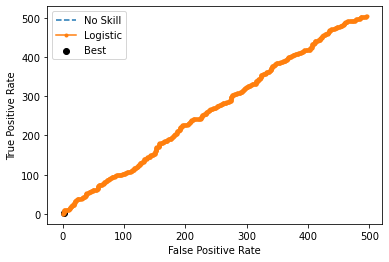

In [40]:
fpr, tpr, thresholds = fps, tps, y_pred[threshold_idxs]
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

# AUC

In [22]:
m = AUC()
m.update_state(y_true, y_pred)
auc_keras = m.result().numpy()
print("AUC (Keras): %.3f" % auc_keras)

AUC (Keras): 0.481


In [21]:
# Compute AUC using Scikit-Learn
auc_sklearn = roc_auc_score(y_true, y_pred)
print("AUC (Scikit-Learn): %.3f" % auc_sklearn)

AUC (Scikit-Learn): 0.481


In [27]:
gmeans[239]

0.4890964217614211

Best Threshold=0.524970, G-Mean=0.489


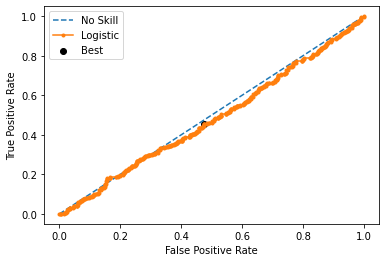

In [20]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

# PRC

In [ ]:
# Compute Precision-Recall curve using Keras
precision, recall, thresholds = precision_recall_curve(y_true_categorical[:, 1], y_pred)

# Compute Precision-Recall curve using Scikit-Learn
precision_sklearn, recall_sklearn, thresholds_sklearn = precision_recall_curve(y_true, y_pred)

# Check if the precision-recall curves are equal
assert np.allclose(precision, precision_sklearn)
assert np.allclose(recall, recall_sklearn)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def predict_with_fixed_threshold(predictions, threshold=0.5):
  binary_predictions = np.zeros(predictions.shape)
  binary_predictions[predictions > threshold] = 1
  return binary_predictions

print(
  classification_report(testy, predict_with_fixed_threshold(yhat, thresholds[ix]) )
)
print(
  confusion_matrix(testy, predict_with_fixed_threshold(yhat, thresholds[ix]) )
)